In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
from preprocessingFunctions import loadData
from preprocessingFunctions import preProcessChoices
from preprocessingFunctions import preProcessReactionTimes
from preprocessingFunctions import makeSideChoices

from scoringFunctions import scoreChoices
from scoringFunctions import scoreChoicesUnfiltered
from scoringFunctions import scorePerPhase

from analysisFunctions import testRTbasedOnPhaseScoring

from rtDistFunctions import computeDensityPerPhase

from plottingFunctions import plotIt

In [4]:
os.chdir('/home/esther/Desktop/BehavioralTraining')

#%% LOAD IN DATA
Adat,Mdat = loadData()

In [6]:
#%% PREPROCESS DATA (get sides and choices)
choices, sides = preProcessChoices(Adat, Mdat)

In [7]:
# LOAD IN REACTION TIMES AND REMOVE CANCELLED AND TIMED OUT TRIALS
rt_raw = Adat.xs('reaction_time',level = 1, axis = 1)
#rtChoicesFilter = rt_raw[~np.isnan(choices)] # shouldn't need to do this as reaction times are masked by correct and incorrect (Which are already filtered)
rt = rt_raw[rt_raw > 100] # only include trials where researcher did not give reward before sensors were activated 

In [8]:
# determine which trials were correct and incorrect come from sensor scores only
correct, incorrect, nTotalTrials = scoreChoicesUnfiltered(choices, sides)

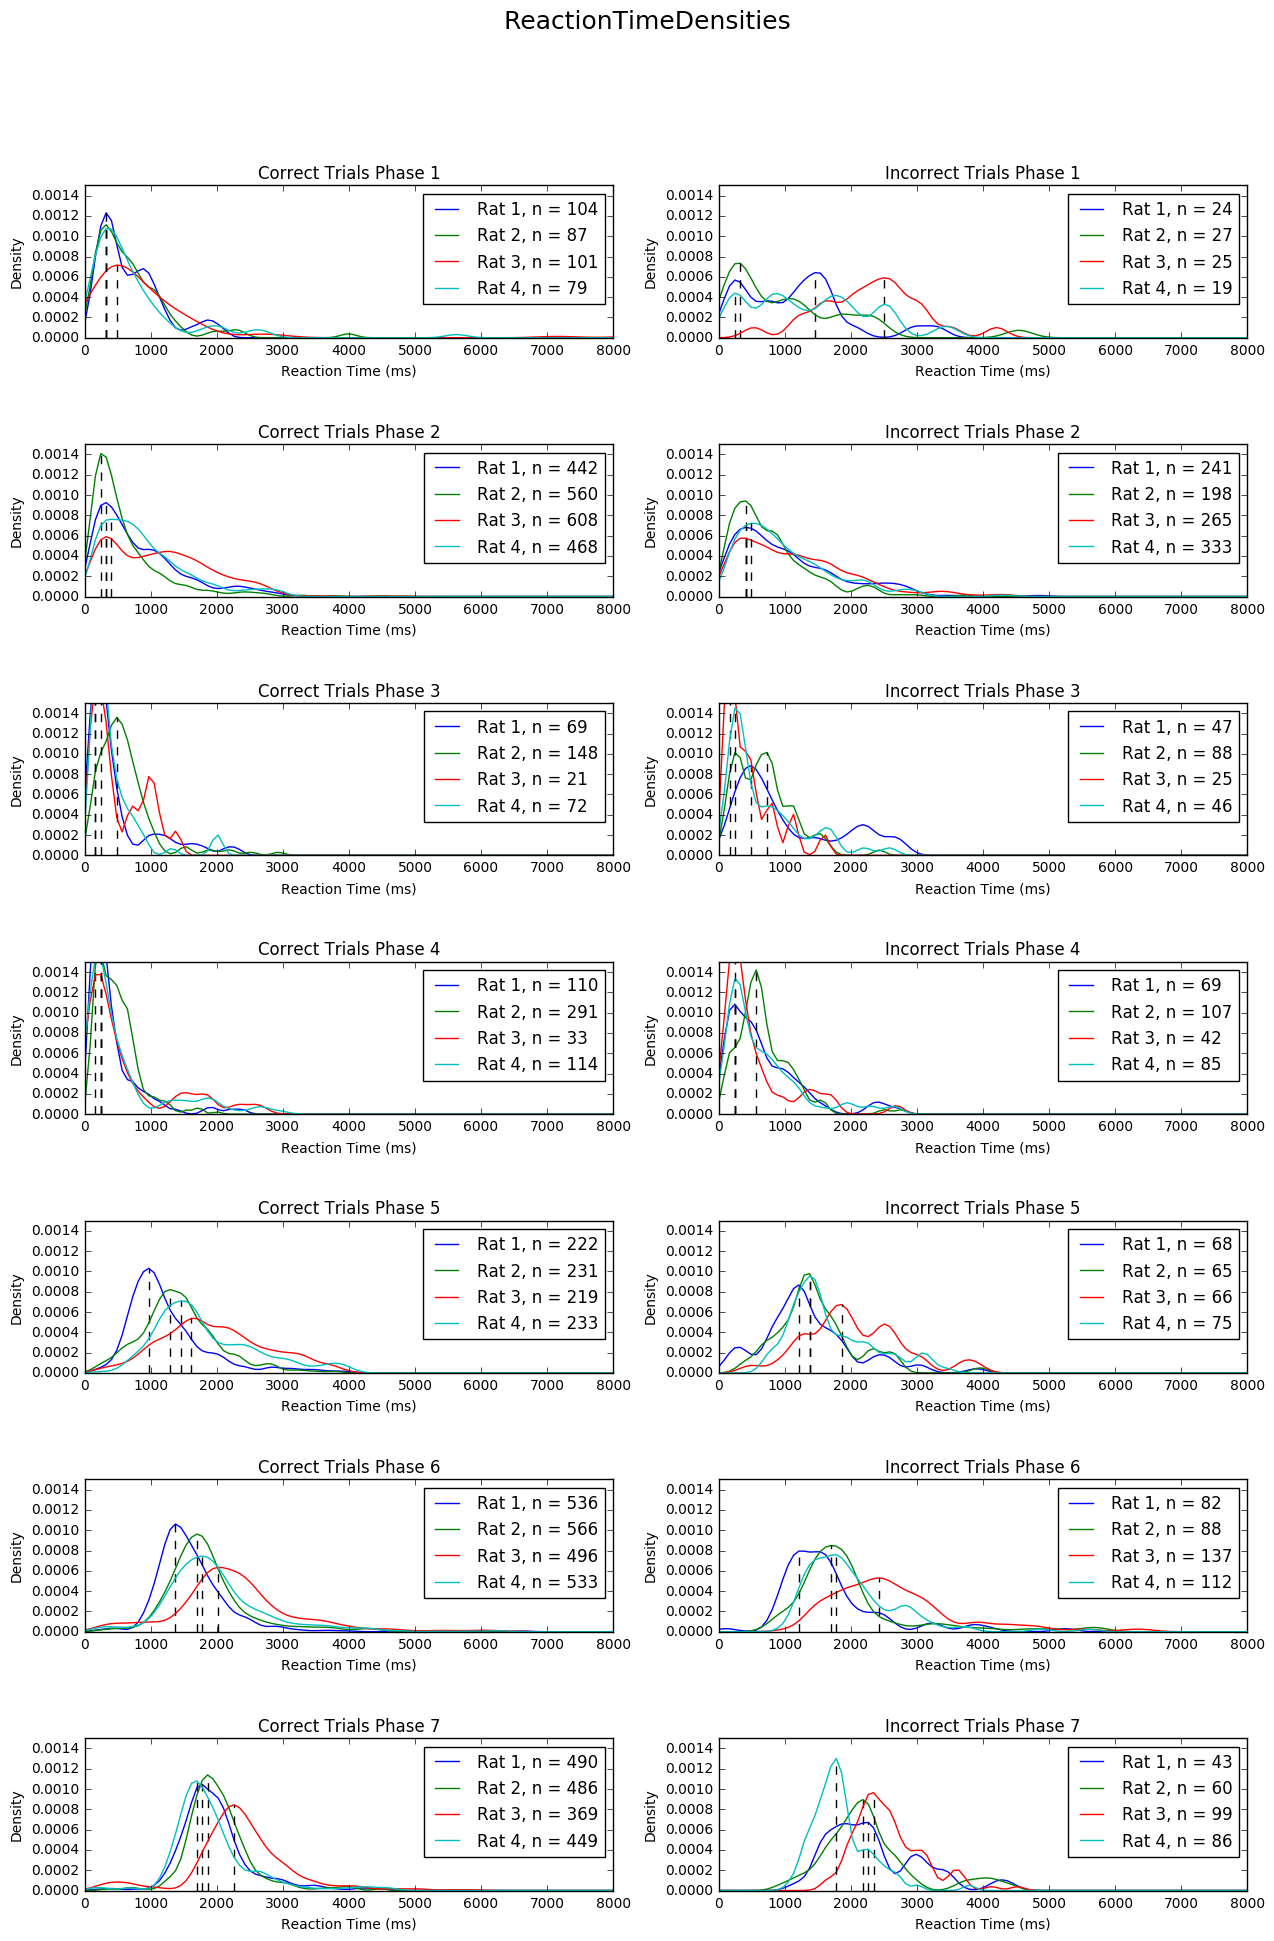

In [9]:
computeDensityPerPhase(rt, correct, incorrect)

In [12]:
# This isn't working quite yet, and not urgent so will drop it for now, but will keep the slicing as a reference, 
# there's a good chance it'll come in handy later. 

idx = pd.IndexSlice

sliceTestRt = rt.loc[idx[5:7]]
sliceTestCorrect = correct.loc[idx[5:7]]
sliceTestIncorrect = incorrect.loc[idx[5:7]]

#computeDensityPerPhase(rt.loc[idx[5:7]], correct.loc[idx[5:7]], incorrect.loc[idx[5:7]])

## Describing the Distributions

In [11]:
quartilesCorrect = rt[correct].groupby(level = "Phase").quantile([.25,.75])
quartilesIncorrect = rt[incorrect].groupby(level = "Phase").quantile([.25,.75])

In [12]:
quartilesCorrect

Animal            1        2        3        4
Phase                                         
1     0.25   321.75   324.00   383.00   288.50
      0.75   940.25   885.00  1110.00   867.00
2     0.25   326.25   236.00   447.75   411.50
      0.75  1143.50   781.75  1665.25  1212.75
3     0.25   159.00   327.50   179.00   179.75
      0.75   475.00   722.50   854.00   458.00
4     0.25   165.25   239.00   160.00   167.50
      0.75   459.75   637.00   760.00   629.75
5     0.25   863.00  1084.50  1401.50  1276.00
      0.75  1456.00  1766.50  2482.00  2282.00
6     0.25  1290.00  1502.50  1812.75  1509.00
      0.75  1825.00  2045.50  2602.25  2243.00
7     0.25  1670.25  1744.75  2040.00  1574.00
      0.75  2145.00  2212.00  2671.00  2083.00

In [13]:
iqrCorrect = quartilesCorrect.xs(0.75, level = 1) - quartilesCorrect.xs(0.25, level = 1)
iqrIncorrect = quartilesIncorrect.xs(0.75, level = 1) - quartilesIncorrect.xs(0.25, level = 1)

In [14]:
iqr = pd.concat([iqrCorrect,iqrIncorrect], axis = 1, keys =['correct','incorrect'])

In [15]:
iqr

correct                          incorrect                           
Animal       1       2       3        4         1        2        3        4
Phase                                                                       
1       618.50  561.00   727.0   578.50   1122.75  1225.50   945.00  1219.50
2       817.25  545.75  1217.5   801.25   1037.00   663.00  1159.00   940.00
3       316.00  395.00   675.0   278.25   1197.00   577.50   392.00   698.25
4       294.50  398.00   600.0   462.25    709.00   460.50   453.00   591.00
5       593.00  682.00  1080.5  1006.00    731.25   579.00   942.25   807.00
6       535.00  543.00   789.5   734.00    645.75   542.00  1040.00   755.50
7       474.75  467.25   631.0   509.00   1044.00   580.25   615.50   437.50

In [118]:
iqr["correct"].ix[5:7]

Animal,1,2,3,4
Phase,,,,
5,593.00,682.00,1080.5,1006
6,535.00,543.00,789.5,734
7,474.75,467.25,631.0,509


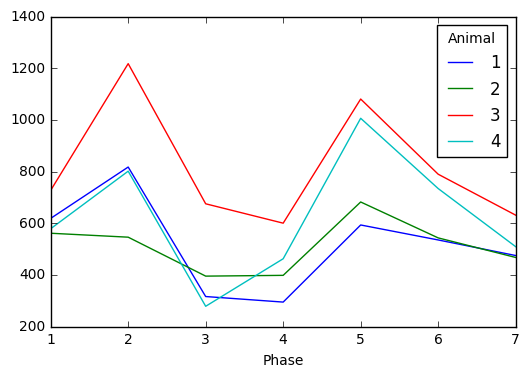

In [16]:
iqr["correct"].plot()

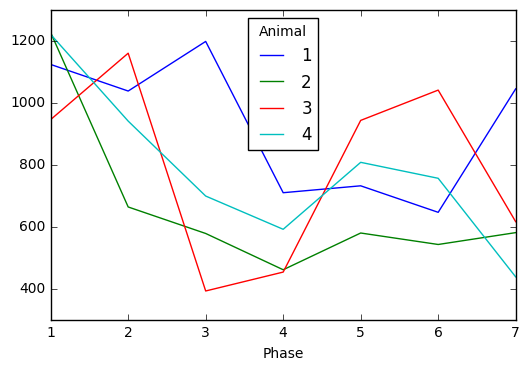

In [17]:
iqr["incorrect"].plot()
#iqr["incorrect"].ix[5:7].mean(axis = 1).plot()

In [20]:
iqrAvgAnimal = pd.concat([iqr['correct'].mean(axis = 1),iqr['incorrect'].mean(axis = 1)], axis = 1, keys =['correct','incorrect'])

In [21]:
iqrAvgAnimal

,correct,incorrect
Phase,,
1,621.2500,1128.1875
2,845.4375,949.7500
3,416.0625,716.1875
4,438.6875,553.3750
5,840.3750,764.8750
6,650.3750,745.8125
7,520.5000,669.3125


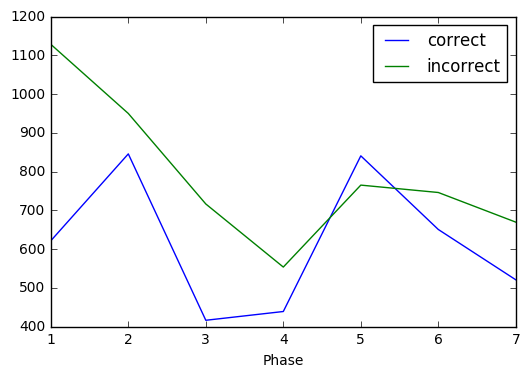

In [22]:
iqrAvgAnimal.plot()

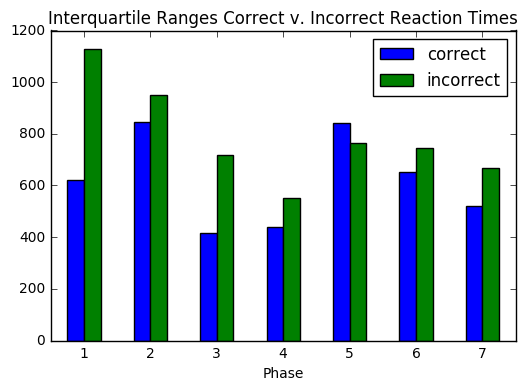

In [23]:
iqrAvgAnimal.plot(kind="bar", title = "Interquartile Ranges Correct v. Incorrect Reaction Times",rot =0)

These interquartile ranges are not as impressive now that the incorrect selection is actually calculated properly (really excluding all the cancelled, timed out trials, etc). 

In [9]:
computeDensityPerPhase(rt, cor, incor)

NameError: name 'cor' is not defined

### Boxplots

OrderedDict([(1, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd56f0850>),
             (2, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd52bced0>),
             (3, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd5a01e10>),
             (4, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd53bbdd0>),
             (5, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd4eaa850>),
             (6, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd4e9c090>),
             (7, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd4f10850>)])

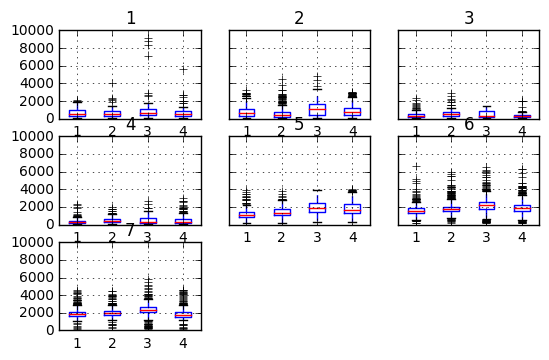

In [142]:
rt[correct].groupby(level = "Phase").boxplot(return_type = 'axes')

OrderedDict([(1, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd4fb14d0>),
             (2, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd51ce610>),
             (3, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd5402fd0>),
             (4, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd4eebb50>),
             (5, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd51c7290>),
             (6, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd5060550>),
             (7, <matplotlib.axes._subplots.AxesSubplot at 0x7f1fd5694a10>)])

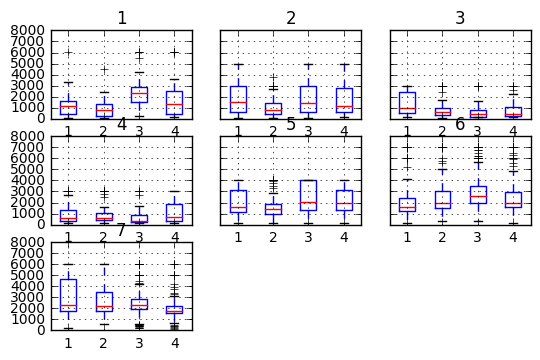

In [143]:
rt[incorrect].groupby(level = "Phase").boxplot(return_type = 'axes')

Perhaps the problem is rat 3 (who had the most trouble learning), I'll take him out and see what happends

In [40]:
idx = pd.IndexSlice
cor = iqr.loc[idx[:],idx['correct',['1','2','4']]]
incor = iqr.loc[idx[:],idx['incorrect',['1','2','4']]]


In [45]:
cor

correct                 
Animal       1       2        4
Phase                          
1       618.50  561.00   578.50
2       817.25  545.75   801.25
3       316.00  395.00   278.25
4       294.50  398.00   462.25
5       593.00  682.00  1006.00
6       535.00  543.00   734.00
7       474.75  467.25   509.00

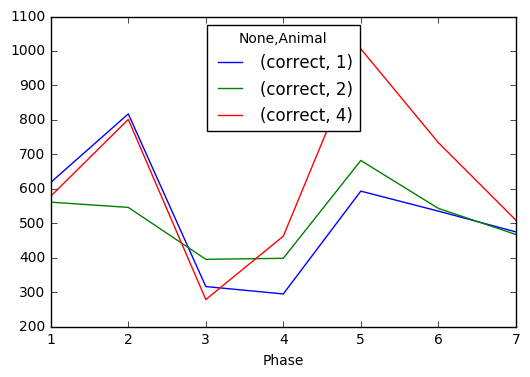

In [46]:
cor.plot()

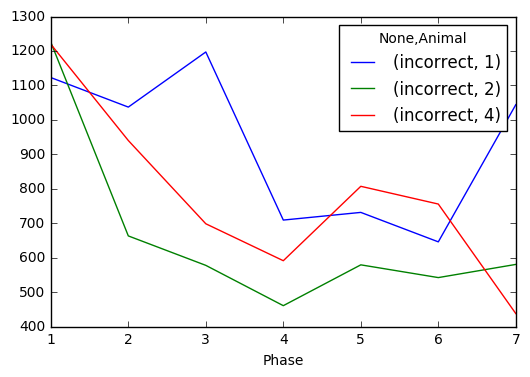

In [48]:
incor.plot()

well, nothing spectacular...

In [41]:
iqrAvgAnimalSansDumb = pd.concat([cor.mean(axis = 1),incor.mean(axis = 1)], axis = 1, keys =['correct','incorrect'])

In [42]:
iqrAvgAnimalSansDumb

,correct,incorrect
Phase,,
1,586.000000,1189.250000
2,721.416667,880.000000
3,329.750000,824.250000
4,384.916667,586.833333
5,760.333333,705.750000
6,604.000000,647.750000
7,483.666667,687.250000


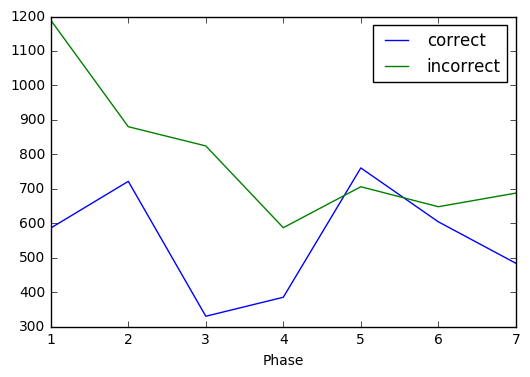

In [38]:
iqrAvgAnimalSansDumb.plot()


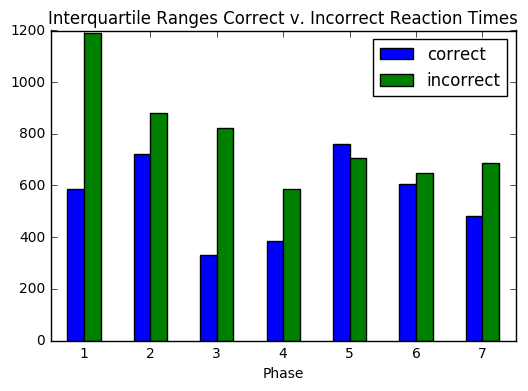

In [39]:
iqrAvgAnimalSansDumb.plot(kind="bar", title = "Interquartile Ranges Correct v. Incorrect Reaction Times",rot =0)

Not much different apparently, but when looking at the densities there was a definite difference between the correct and incorrect trials. 

### Skewedness and Kurtosis of peaks

In [55]:
skewdness = pd.concat([rt[correct].stack().groupby(level = ["Phase","Animal"]).skew(),rt[incorrect].stack().groupby(level = ["Phase","Animal"]).skew()], axis = 1, keys =[('skewdness', 'correct'), ('skewdness','incorrect')])



In [59]:
skewdness.unstack()

skewdness                                                              \
         correct                               incorrect                       
Animal         1         2         3         4         1         2         3   
Phase                                                                          
1       1.148914  2.697986  4.038624  3.410860  0.939565  1.738146  0.074425   
2       1.259065  2.475460  0.716696  1.237138  1.235919  1.630198  1.133150   
3       1.977566  2.495344  0.761983  2.787471  0.845679  1.101293  1.504740   
4       2.704739  1.634987  1.531365  1.867582  1.714452  1.877698  1.974772   
5       1.755643  0.762322  0.277337  0.903977  0.992368  1.171943  0.441252   
6       2.744804  2.110255  1.018238  1.535729  1.965619  2.243289  1.405616   
7       1.383610  1.366819  0.414923  1.591441  0.984765  1.248644  1.042786   

                  
                  
Animal         4  
Phase             
1       0.438443  
2       1.320544  
3       1.424605  
4       1.695074  
5       0.910358  
6       1.976635  
7       1.404244

In [75]:
avgSkew = skewdness.groupby(level = ["Phase"]).mean()

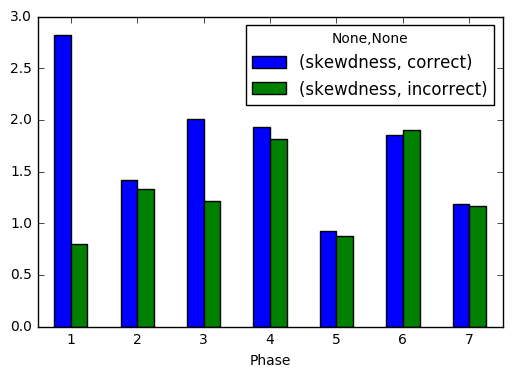

In [77]:
avgSkew.plot(kind = "bar", rot = 0)

In [86]:
def getkurt(group):
    return group.kurt()


kurtosis = pd.concat([rt[correct].stack().groupby(level = ["Phase","Animal"]).apply(getkurt),rt[incorrect].stack().groupby(level = ["Phase","Animal"]).apply(getkurt)], axis = 1, keys =[('kurtosis', 'correct'), ('kurtosis','incorrect')])


In [87]:
kurtosis

kurtosis          
                correct incorrect
Phase Animal                     
1     1        0.822444  1.004536
      2       11.026469  4.089091
      3       16.848237  0.594562
      4       16.264921 -0.494404
2     1        1.156202  1.752515
      2        8.195325  3.496778
      3        0.460328  1.334183
      4        1.236461  2.181912
3     1        3.289297 -0.696355
      2        8.333417  1.976625
      3       -0.767021  2.006007
      4        8.381101  1.566194
4     1        8.213184  3.066837
      2        3.836393  6.047637
      3        1.325714  4.096874
      4        2.689401  2.622408
5     1        3.791217  1.770988
      2        1.369550  2.868337
      3       -0.428183  0.264907
      4        0.335562  0.102333
6     1       15.610444  5.174645
      2        7.247993  5.494922
      3        3.105506  2.550744
      4        4.777494  6.093564
7     1        4.305635  0.734561
      2        5.229643  1.830240
      3        3.415503  1.498691
      4        4.859262  3.680262

In [88]:
avgKurt = kurtosis.groupby(level = ["Phase"]).mean()

In [89]:
avgKurt

kurtosis          
         correct incorrect
Phase                     
1      11.240518  1.298446
2       2.762079  2.191347
3       4.809198  1.213118
4       4.016173  3.958439
5       1.267036  1.251641
6       7.685359  4.828469
7       4.452511  1.935939

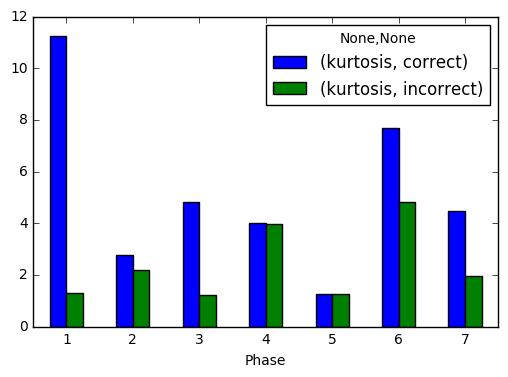

In [90]:
avgKurt.plot(kind = "bar", rot = 0)

In [67]:
avgSkew = skewdness.mean(axis = 1, level = "Phase")

AssertionError: Level Phase not in index

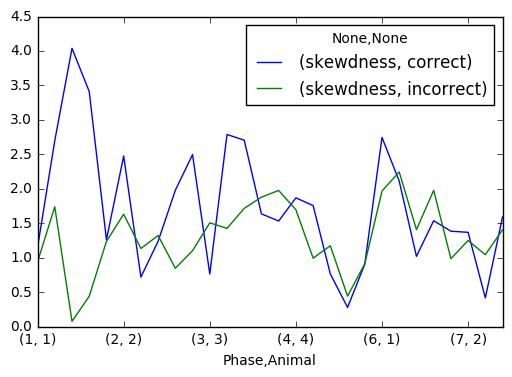

In [57]:
skewdness.plot()

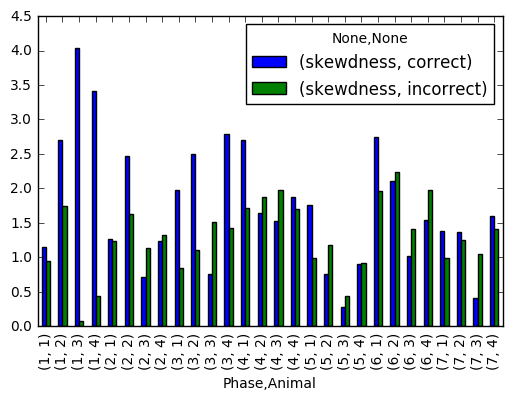

In [58]:
skewdness.plot(kind = "bar")

In [43]:
rt[correct].apply([skew,kurt])

NameError: name 'skew' is not defined